In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

plt.rcParams["figure.dpi"] = 600

In [2]:
val = np.array([0, 1, 2])

def gamble(n, p1=None, p2=None):
    choise_player_1 = np.random.choice(val, n, p=p1)
    choise_player_2 = np.random.choice(val, n, p=p2)

    summ = choise_player_1 + choise_player_2
    score_player_1 = np.where(summ % 2 == 0, 1, -1)

    return score_player_1.mean()
gamble = np.vectorize(gamble, excluded=[1, 2])


def E_player_1(p1=[1 / 3, 1 / 3, 1 / 3], p2=[1 / 3, 1 / 3, 1 / 3]):
    p_even = (
        p1[0] * p2[0] + p1[0] * p2[2] + p1[1] * p2[1] + p1[2] * p2[0] + p1[2] * p2[2]
    )
    return 2 * p_even - 1

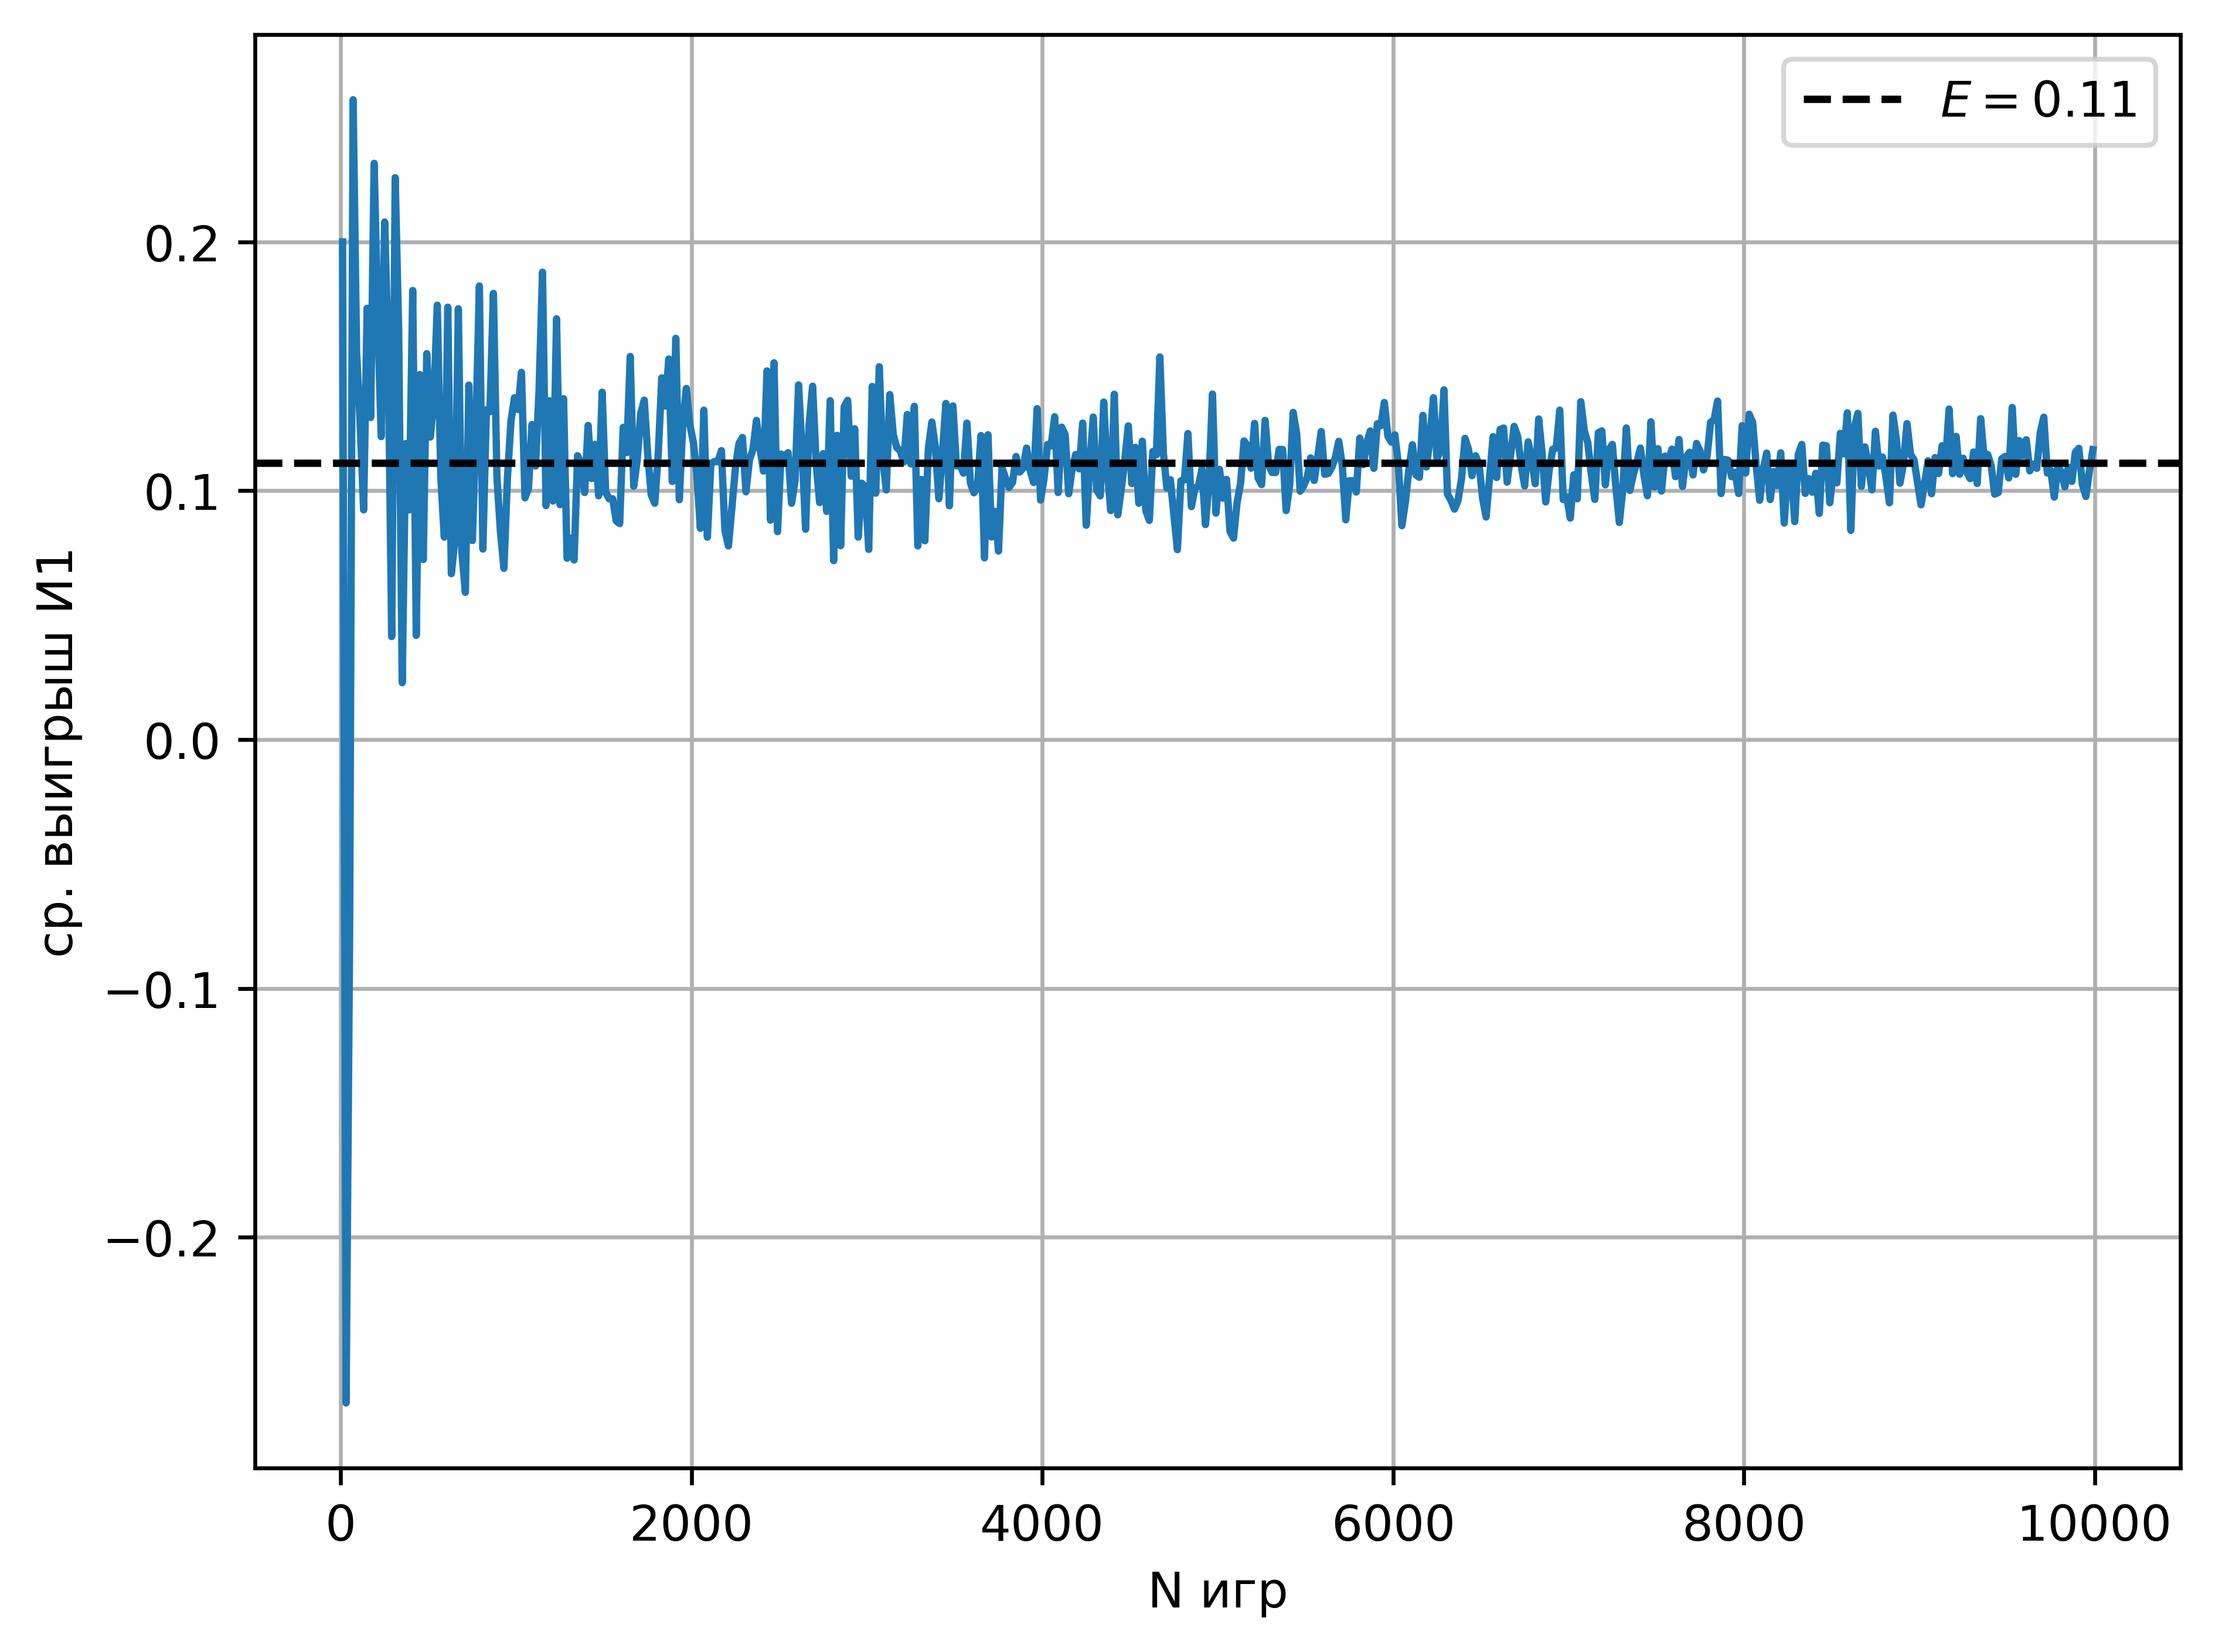

In [3]:

rounds = np.arange(10, 10_000, 20)
mean_scores = gamble(rounds)
real_mean = E_player_1()
plt.plot(rounds, mean_scores)
plt.axhline(real_mean, linestyle='--', color='black', label=rf'$E={real_mean:.2f}$')
plt.xlabel('N игр')
plt.ylabel('ср. выигрыш И1')
plt.grid(True)
plt.tight_layout()
plt.legend()

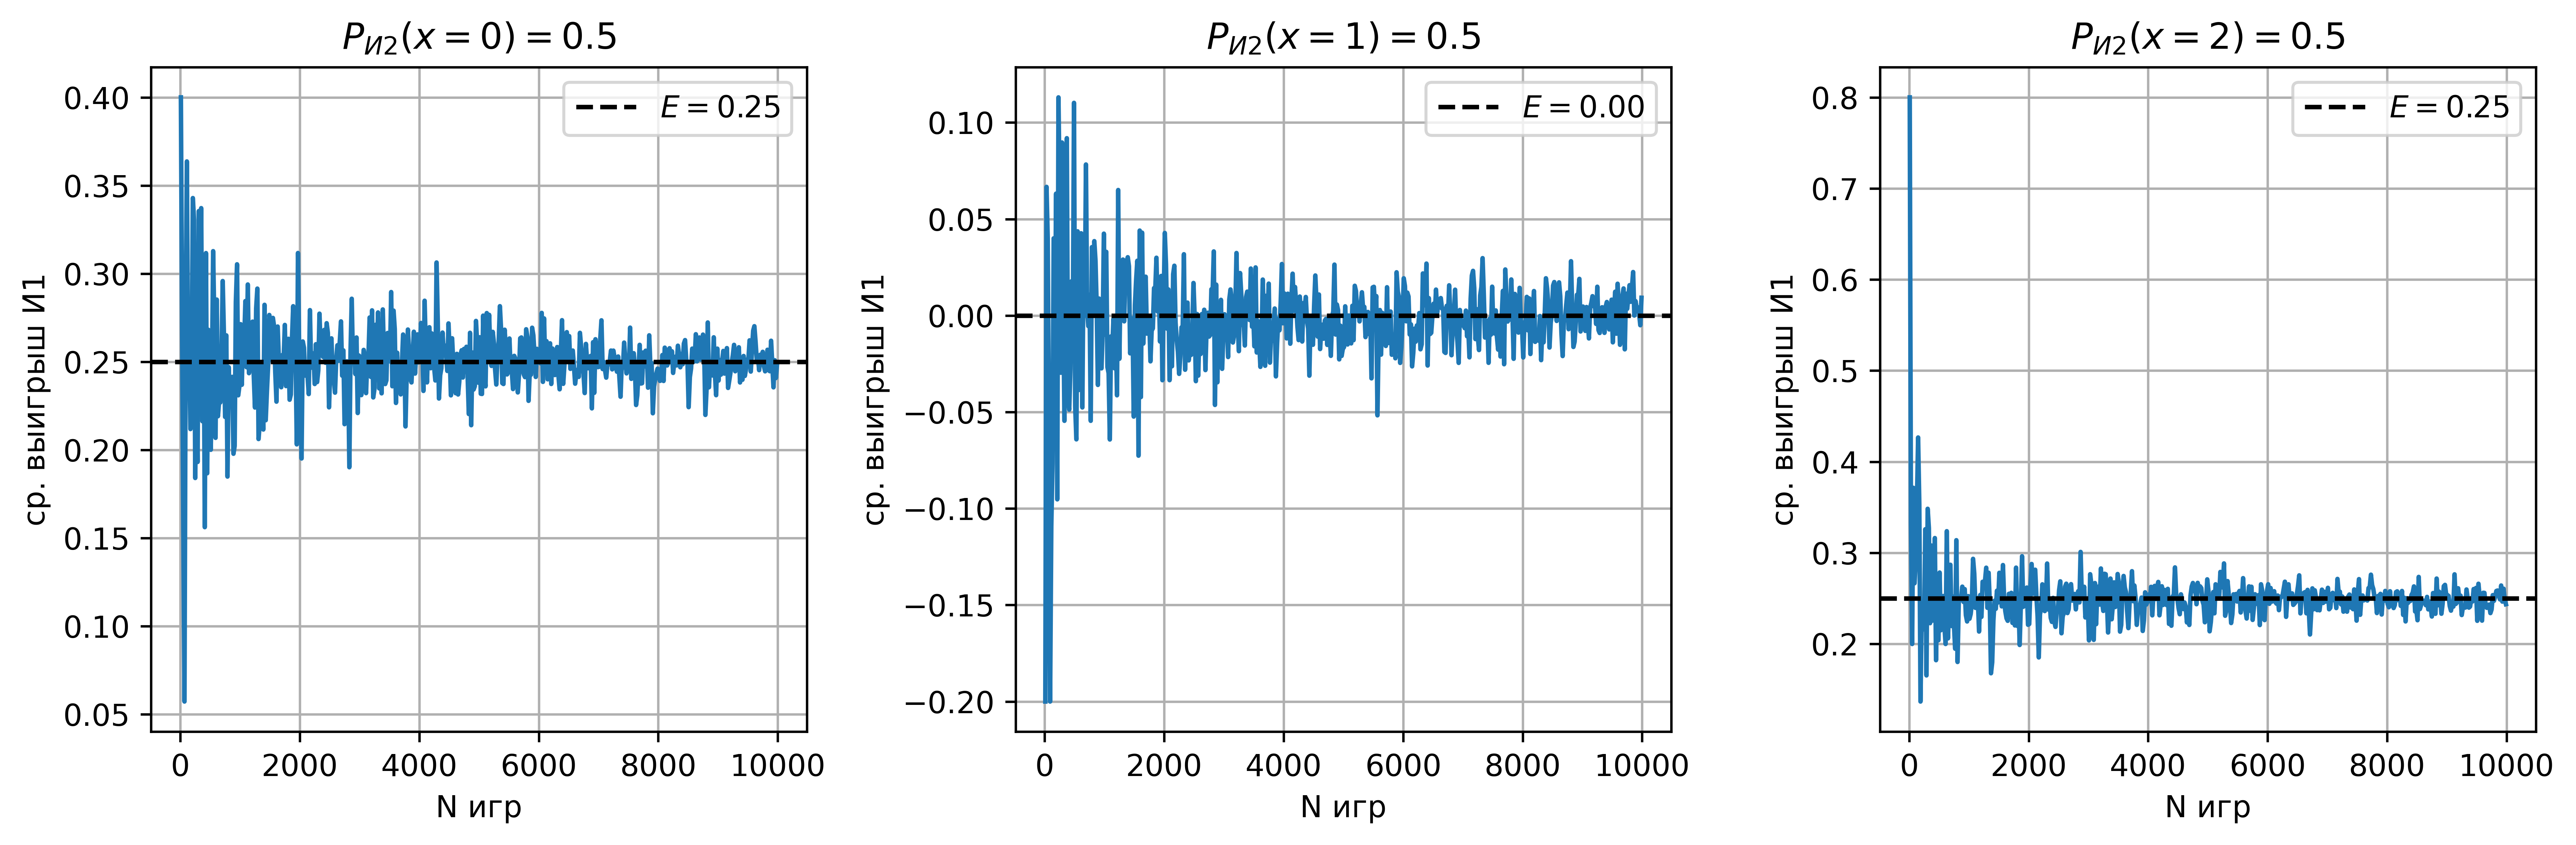

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

p1 = [0.25, 0.25, 0.5]
for i in range(3):
    p2 = [0.25, 0.25, 0.25]
    p2[i] = 0.5

    rounds = np.arange(10, 10_000, 20)
    mean_scores = gamble(rounds, p1, p2)
    real_mean = E_player_1(p1, p2)

    ax[i].plot(rounds, mean_scores)
    ax[i].axhline(real_mean, linestyle="--", color="black", label=rf"$E={real_mean:.2f}$")
    ax[i].set_xlabel("N игр")
    ax[i].set_ylabel("ср. выигрыш И1")
    ax[i].set_title(rf'$P_{{И2}}(x={val[i]})=0.5$')
    ax[i].grid(True)
    ax[i].legend()
plt.tight_layout()